## <center> Linear equations - solving methods </center>

In [1]:
from scipy import linalg as la
import numpy as np
import sympy as sym
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### Quadratic Systems

There are different ways to solve a system of linear equations, in the following notebook, some methods will be explored. The system of equations to be solved is the following:

$$ 2*x + 3*y = 4$$
$$ 5*x + 4*y = 3$$

#### Numeric solving - Linear algebra

$$ A*x = b $$

In [2]:
A = np.array([
    [2, 3], 
    [5, 4]])
b = np.array([4, 3])

x = la.solve(A, b)
x

array([-1.,  2.])

In [3]:
# Another way to do it is:
x = np.dot(la.inv(A), b)
x

array([-1.,  2.])

#### Symbolic solving

In [4]:
x, y = sym.symbols("x, y")
ans = sym.linsolve([2 * x + 3 * y - 4, 5 * x + 4 * y - 3], (x, y))
ans

{(-1, 2)}

Another example

In [5]:
p = sym.symbols("p", positive=True)
A2 = sym.Matrix([[1, sym.sqrt(p)], [1, 1 / sym.sqrt(p)]])
A2

Matrix([
[1,   sqrt(p)],
[1, 1/sqrt(p)]])

In [6]:
b2 = sym.Matrix([1, 2])
b2

Matrix([
[1],
[2]])

In [7]:
xp = A2.solve(b2)
xp

Matrix([
[       (2*p - 1)/(p - 1)],
[1/(-sqrt(p) + 1/sqrt(p))]])

### Rectangular Systems
Rectangular systems, with m ≠ n, can be either underdetermined or overdetermined.

#### Underdetermined systems

Underdetermined systems have more variables than equations ($m < n$), so the solution cannot be fully determined. Therefore, for such a system, the solution must be given in terms of the remaining free variables. This makes it difficult to treat this type of problem numerically, but a symbolic approach can often be used instead.

In [8]:
x_vars = sym.symbols("x1, x2, x3")
a_under = sym.Matrix([[1, 2, 3], [4, 5, 6]])
x_under = sym.Matrix(x_vars)
b_under = sym.Matrix([7, 8])

f = a_under * x_under - b_under
sol = sym.solve(f, x_vars)
sol

{x1: x3 - 19/3, x2: 20/3 - 2*x3}

#### Overdetermined systmes
On the other hand, if the system is overdetermined and has more equations than unknown variables, $m > n$, then we have more constraints than degrees of freedom, and in general there is no exact solution to such a system. However, it is often interesting to find an approximate solution to an overdetermined system. There are many ways in which an overdetermined system can be solved, the most common one is by Least Square Method (LSM).

##### *Least squares method*

The least squares method is a statistical procedure to find the best fit for a set of data points by minimizing the
sum of the offsets or residuals of points from the plotted curve. Least squares regression is used to predict the
behavior of dependent variables.

In [9]:
# Defining the true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y = a + b * x + c * x ** 2

# Data with noise
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X ** 2 + np.random.randn(m)

In [10]:
# fit the data to the model using linear least square
A = np.vstack([X ** 0, X ** 1, X ** 2])
sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1] * x + sol[2] * x ** 2

r2 = r2_score(y, y_fit)
print(r2)

0.9795605769832074


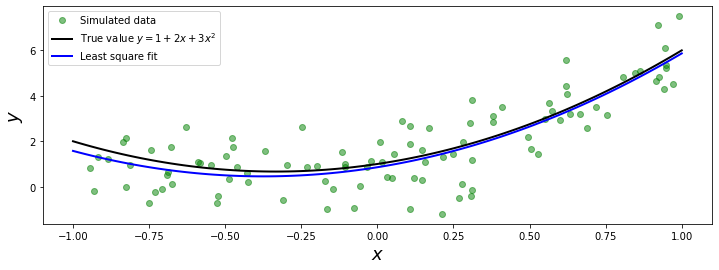

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y, 'k', lw=2, label=r'True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)
plt.show()